In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", None)
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [3]:
df = pd.read_csv("datasets/covid_cleaning.csv")
df.head()

,tweets
0,china hapus wajib karantina bagi pelancong asing di saat kasus covid melonjak
1,covid kembali merebak di china pencabutan ppkm perlu hatihati
2,sebaran konfirmasi positif covid di indonesia provinsi nihil kasus
3,update covid per senin desember positif orang sembuh dan meninggal
4,positif covid di ri tambah pasien sembuh orang


In [4]:
df.iloc[15922:15926]

,tweets
15922,menko pmk dorong vaksinasi covid pada anak usia tahun
15923,“kuncinya hanya itu kalau tidak bisa kita kendalikan ya ekonominya akan turun dan terpuruk lagi” kata jokowi
15924,terdapat penambahan kasus aktif covid di sejumlah wilayah di jatim meski demikian kasus diklaim masih terkendali karena di bawah
15925,lonjakan covid sejumlah kios di pasar natal christkindlmarket jerman mulai tutup


# Remove “ and ” (not double quote) "

In [5]:
filtered_df = df[df['tweets'].str.contains('“')]

In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 157 to 32241
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  127 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


In [7]:
filtered_df.head()

,tweets
157,hampir terlepas dari pandemi covid setelah beberapa tahun lalu peraturan pemerintah tentang larangan penyelenggaraan acara pergantian tahun akhirnya terlahirlah inovasi hotel ambhara dengan mengadakan perayaan pergantian tahun dengan tema “bali night party”
472,china melonggarkan kebijakan tentang covid “akan ada mobilitas longgar untuk warga dan aliran barang pemulihan dalam seluruh aspek ekonomi akan meningkat vitalitas akan terdorong” kata yin yanlin
721,“yang saya tekankan di sini adalah pengawasan diperketat tapi tidak memilih negara” kata pm malaysia
920,“karena kita sudah masuk kepada pencabutan ppkm masalah vaksinasi ini harus lebih ditingkatkan
1366,“vaksinasi booster kedua berjalan mulai januari gratis” kata airlangga


In [8]:
df['clean_tweets'] = df['tweets'].str.replace('[“”]', '')

C:\Users\asus\AppData\Local\Temp\ipykernel_11360\1672777763.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_tweets'] = df['tweets'].str.replace('[“”]', '')


In [11]:
df.iloc[1365:1368]

,tweets,clean_tweets
1365,presiden jokowi mengungkapkan alasan tidak melakukan lockdown di awal pandemi covid ia menilai keputusan lockdown bisa memicu kerusuhan,presiden jokowi mengungkapkan alasan tidak melakukan lockdown di awal pandemi covid ia menilai keputusan lockdown bisa memicu kerusuhan
1366,“vaksinasi booster kedua berjalan mulai januari gratis” kata airlangga,vaksinasi booster kedua berjalan mulai januari gratis kata airlangga
1367,jokowi curhat dirinya sempat kebingungan soal masker saat awal pandemi covid pasalnya tak ada standar maupun pakem dalam penanganan virus corona,jokowi curhat dirinya sempat kebingungan soal masker saat awal pandemi covid pasalnya tak ada standar maupun pakem dalam penanganan virus corona


# Tokenize dataframe

In [14]:
df_clean = df[['clean_tweets']].copy()

In [15]:
df_clean['tokenized_tweets'] = df['clean_tweets'].apply(word_tokenize)

In [19]:
df_clean.iloc[15922:15926]

,clean_tweets,tokenized_tweets
15922,menko pmk dorong vaksinasi covid pada anak usia tahun,"[menko, pmk, dorong, vaksinasi, covid, pada, anak, usia, tahun]"
15923,kuncinya hanya itu kalau tidak bisa kita kendalikan ya ekonominya akan turun dan terpuruk lagi kata jokowi,"[kuncinya, hanya, itu, kalau, tidak, bisa, kita, kendalikan, ya, ekonominya, akan, turun, dan, terpuruk, lagi, kata, jokowi]"
15924,terdapat penambahan kasus aktif covid di sejumlah wilayah di jatim meski demikian kasus diklaim masih terkendali karena di bawah,"[terdapat, penambahan, kasus, aktif, covid, di, sejumlah, wilayah, di, jatim, meski, demikian, kasus, diklaim, masih, terkendali, karena, di, bawah]"
15925,lonjakan covid sejumlah kios di pasar natal christkindlmarket jerman mulai tutup,"[lonjakan, covid, sejumlah, kios, di, pasar, natal, christkindlmarket, jerman, mulai, tutup]"


In [20]:
df_clean.head()

,clean_tweets,tokenized_tweets
0,china hapus wajib karantina bagi pelancong asing di saat kasus covid melonjak,"[china, hapus, wajib, karantina, bagi, pelancong, asing, di, saat, kasus, covid, melonjak]"
1,covid kembali merebak di china pencabutan ppkm perlu hatihati,"[covid, kembali, merebak, di, china, pencabutan, ppkm, perlu, hatihati]"
2,sebaran konfirmasi positif covid di indonesia provinsi nihil kasus,"[sebaran, konfirmasi, positif, covid, di, indonesia, provinsi, nihil, kasus]"
3,update covid per senin desember positif orang sembuh dan meninggal,"[update, covid, per, senin, desember, positif, orang, sembuh, dan, meninggal]"
4,positif covid di ri tambah pasien sembuh orang,"[positif, covid, di, ri, tambah, pasien, sembuh, orang]"


# Wordcloud for search unimportant word that oftenly used

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
text_for_wordcloud = ' '.join(df_clean['clean_tweets'])

In [27]:
print(text_for_wordcloud[:1000])

china hapus wajib karantina bagi pelancong asing di saat kasus covid melonjak       covid kembali merebak di china pencabutan ppkm perlu hatihati        sebaran  konfirmasi positif covid di indonesia  provinsi nihil kasus        update covid per senin  desember  positif  orang sembuh  dan meninggal         positif covid di ri tambah  pasien sembuh  orang  breaking news  kasus covid bertambah  hari ini        kenapa covid di jepang menggila lagi tembus  ribu kasus  lonjakan kasus covid di china bikin pabrik terpaksa tutup  covid merebak lagi di china bang saleh ingatkan pemerintah   kasus covid turun rsdc wisma atlet kemayoran segera ditutup   kasus corona di china tak terkendali diperkirakan angka penderita covid tembus  juta orang pada bulan ini  rumah sakit kewalahan dari atas ke bawah  provinsi di china catat satu juta kasus covid per hari  penyebaran virus corona covid di china terus menggila salah satu wilayah yang sedang berjuang melawan covid yaitu provinsi zhejiang china  situa

In [28]:
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate(text_for_wordcloud)

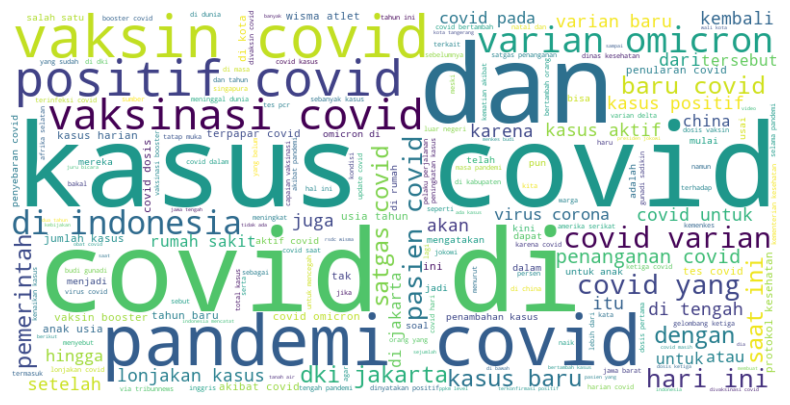

In [29]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
stop_factory = StopWordRemoverFactory()
more_stopword = ["dengan", "ia","bahwa","oleh"]
sastrawi_stopwords = set(stop_factory.get_stop_words()+more_stopword)
stopword = stop_factory.create_stop_word_remover()
print(len(sastrawi_stopwords))
print(sastrawi_stopwords)

123
{'yang', 'dst', 'hanya', 'dulunya', 'akan', 'sebab', 'agar', 'dalam', 'sambil', 'jika', 'saat', 'seharusnya', 'bahwa', 'juga', 'sekitar', 'telah', 'ingin', 'kecuali', 'di', 'nggak', 'anu', 'serta', 'secara', 'pada', 'kita', 'kenapa', 'maka', 'anda', 'ketika', 'agak', 'para', 'itu', 'dua', 'sementara', 'adalah', 'kami', 'sesuatu', 'pasti', 'untuk', 'mari', 'dengan', 'boleh', 'seperti', 'yakni', 'pula', 'toh', 'ok', 'demi', 'oh', 'bagaimanapun', 'karena', 'itulah', 'kemana', 'tentang', 'sampai', 'sebelum', 'apakah', 'ada', 'demikian', 'namun', 'seolah', 'tanpa', 'tetapi', 'bisa', 'yaitu', 'nanti', 'saya', 'harus', 'ini', 'kepada', 'setidaknya', 'sudah', 'sedangkan', 'sebetulnya', 'lain', 'sebagai', 'tidak', 'belum', 'selagi', 'dsb', 'daripada', 'dahulu', 'apalagi', 'bagi', 'tentu', 'oleh', 'sesudah', 'masih', 'hal', 'melainkan', 'kah', 'tapi', 'dll', 'sehingga', 'mereka', 'mengapa', 'setiap', 'seterusnya', 'menurut', 'seraya', 'atau', 'ya', 'setelah', 'dan', 'amat', 'ke', 'walau', 'k

In [31]:
nltk_stopwords = set(stopwords.words('indonesian'))
print(len(nltk_stopwords))
print(nltk_stopwords)

757
{'mendapatkan', 'sebaik', 'sedikit', 'bapak', 'seringnya', 'terjadi', 'berkali-kali', 'manalagi', 'sebagainya', 'agaknya', 'makin', 'semasa', 'katanya', 'diperbuat', 'sebab', 'segalanya', 'hampir', 'merekalah', 'dalam', 'pertama', 'sepantasnya', 'berada', 'sambil', 'sebelumnya', 'sebenarnya', 'sini', 'seharusnya', 'justru', 'terus', 'bahwa', 'juga', 'begitulah', 'kinilah', 'sewaktu', 'sekitar', 'sesampai', 'ataukah', 'dimulailah', 'padahal', 'berkeinginan', 'di', 'bung', 'mirip', 'dibuat', 'mendapat', 'tanyanya', 'secara', 'sendirian', 'maka', 'anda', 'bekerja', 'semacam', 'melihat', 'menanti', 'sementara', 'bagaikan', 'selama', 'pasti', 'sekaligus', 'jumlah', 'memihak', 'memperbuat', 'menuturkan', 'pula', 'berakhirnya', 'depan', 'menanyakan', 'pentingnya', 'apa', 'awal', 'bulan', 'menjadi', 'walaupun', 'jangankan', 'ada', 'didapat', 'semula', 'beginilah', 'datang', 'semampunya', 'belakang', 'sepihak', 'kepada', 'meyakini', 'sudah', 'memberi', 'sejumlah', 'semata-mata', 'tepat', 'i

# Combine stopword nltk and sastrawi + custom stopword

In [67]:
custom_stopwords = {'via', 'selengkapnya', 'tribunnews', 'tvone', 'saksikan', 'live', 'streaming', 'bikin', 'sumber'}
words_to_exclude = {'kasus','jumlahnya', 'jumlah', 'berjumlah', 'masalah', 'akhir', 'berakhir', 'berakhirnya', 'meangakhiri', 'terakhir', 
                    'diakhiri', 'masalahnya', 'bulan', 'awal', 'hari', 'gunakan', 'menggunakan', 'siap', 'mulai', 'dimulai',
                    'dimulainya', 'memulai', 'cukup','asal', 'tahun', 'banyak', 'sebanyak', 'terbanyak', 'mengatakan', 
                    'sedikit', 'termasuk', 'naik', 'baru', 'jangan', 'tambah'}
indonesian_stopwords = nltk_stopwords | sastrawi_stopwords | custom_stopwords
indonesian_stopwords -= words_to_exclude
print(len(indonesian_stopwords))
print(indonesian_stopwords)

749
{'mendapatkan', 'sebaik', 'dst', 'bapak', 'seringnya', 'terjadi', 'berkali-kali', 'manalagi', 'sebagainya', 'agaknya', 'makin', 'semasa', 'katanya', 'diperbuat', 'sebab', 'segalanya', 'hampir', 'merekalah', 'dalam', 'pertama', 'sepantasnya', 'berada', 'sambil', 'sebelumnya', 'sebenarnya', 'sini', 'seharusnya', 'justru', 'terus', 'bahwa', 'juga', 'begitulah', 'kinilah', 'sewaktu', 'sekitar', 'sesampai', 'ataukah', 'dimulailah', 'padahal', 'berkeinginan', 'kecuali', 'di', 'bung', 'mirip', 'dibuat', 'mendapat', 'tanyanya', 'secara', 'sendirian', 'maka', 'anda', 'bekerja', 'semacam', 'melihat', 'menanti', 'sementara', 'bagaikan', 'selama', 'pasti', 'sekaligus', 'memihak', 'memperbuat', 'menuturkan', 'pula', 'depan', 'menanyakan', 'pentingnya', 'apa', 'menjadi', 'walaupun', 'jangankan', 'ada', 'didapat', 'semula', 'beginilah', 'datang', 'semampunya', 'belakang', 'sepihak', 'kepada', 'meyakini', 'sudah', 'memberi', 'sejumlah', 'semata-mata', 'tepat', 'inginkah', 'semakin', 'menanya', 'di

# Stopword removal with nltk

In [68]:
def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in indonesian_stopwords]
    return filtered_tokens

In [69]:
df_clean['filtered_tokens'] = df_clean['tokenized_tweets'].apply(remove_stopwords)

In [70]:
df_clean.head(40).tail(10)

,clean_tweets,tokenized_tweets,filtered_tokens
30,juta warga indonesia sudah mendapat vaksinasi covid penguat,"[juta, warga, indonesia, sudah, mendapat, vaksinasi, covid, penguat]","[juta, warga, indonesia, vaksinasi, covid, penguat]"
31,peningkatan kasus covid di tiongkok diharapkan tidak pengaruhi situasi di indonesia,"[peningkatan, kasus, covid, di, tiongkok, diharapkan, tidak, pengaruhi, situasi, di, indonesia]","[peningkatan, kasus, covid, tiongkok, diharapkan, pengaruhi, situasi, indonesia]"
32,asal sero survei kita sudah sampai ya artinya kita kemungkinan sudah baik ada apapun dari manapun seharusnya sudah tidak jadi masalah ujar jokowi di jakarta senin sumber,"[asal, sero, survei, kita, sudah, sampai, ya, artinya, kita, kemungkinan, sudah, baik, ada, apapun, dari, manapun, seharusnya, sudah, tidak, jadi, masalah, ujar, jokowi, di, jakarta, senin, sumber]","[asal, sero, survei, apapun, manapun, masalah, jokowi, jakarta, senin]"
33,memiliki populasi hingga juta jiwa pemerintah zhejiang mengatakan bahwa ada pasien covid yang dirawat di rumah sakit provinsi sumber,"[memiliki, populasi, hingga, juta, jiwa, pemerintah, zhejiang, mengatakan, bahwa, ada, pasien, covid, yang, dirawat, di, rumah, sakit, provinsi, sumber]","[memiliki, populasi, juta, jiwa, pemerintah, zhejiang, mengatakan, pasien, covid, dirawat, rumah, sakit, provinsi]"
34,pemeriksaan tes usap pcr dilakukan terhadap seribu pengungsi dengan temuan orang yang terkonfirmasi covid kata dia jumlahnya bisa dikatakan relatif sedikit dibanding jumlah pengungsi yang dites usap pcr,"[pemeriksaan, tes, usap, pcr, dilakukan, terhadap, seribu, pengungsi, dengan, temuan, orang, yang, terkonfirmasi, covid, kata, dia, jumlahnya, bisa, dikatakan, relatif, sedikit, dibanding, jumlah, pengungsi, yang, dites, usap, pcr]","[pemeriksaan, tes, usap, pcr, seribu, pengungsi, temuan, orang, terkonfirmasi, covid, jumlahnya, relatif, sedikit, dibanding, jumlah, pengungsi, dites, usap, pcr]"
35,china memutuskan untuk menghentikan publikasi kasus harian dan kematian akibat covid para pakar kesehatan memperingatkan lonjakan infeksi di china membuka kemungkinan munculnya varian baru covid,"[china, memutuskan, untuk, menghentikan, publikasi, kasus, harian, dan, kematian, akibat, covid, para, pakar, kesehatan, memperingatkan, lonjakan, infeksi, di, china, membuka, kemungkinan, munculnya, varian, baru, covid]","[china, memutuskan, menghentikan, publikasi, kasus, harian, kematian, akibat, covid, pakar, kesehatan, memperingatkan, lonjakan, infeksi, china, membuka, munculnya, varian, baru, covid]"
36,menhub curhat dilema kebijakan covid kami ngerem presiden gaspol,"[menhub, curhat, dilema, kebijakan, covid, kami, ngerem, presiden, gaspol]","[menhub, curhat, dilema, kebijakan, covid, ngerem, presiden, gaspol]"
37,gejala covid yang paling dominan saat ini hatihati bukan anosmia,"[gejala, covid, yang, paling, dominan, saat, ini, hatihati, bukan, anosmia]","[gejala, covid, dominan, hatihati, anosmia]"
38,covid menggila di china malaysia waspada,"[covid, menggila, di, china, malaysia, waspada]","[covid, menggila, china, malaysia, waspada]"
39,kasus covid di cina melonjak kemenhub cina batasi penerbangan dari dan menuju ri,"[kasus, covid, di, cina, melonjak, kemenhub, cina, batasi, penerbangan, dari, dan, menuju, ri]","[kasus, covid, cina, melonjak, kemenhub, cina, batasi, penerbangan, ri]"


# Stemming

In [8]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

coba
menropi


In [19]:
sentence = 'setidaknya'
output   = stemmer.stem(sentence)

print(output)
# ekonomi indonesia sedang dalam tumbuh yang bangga

print(stemmer.stem('menropi'))
# mereka tiru

tidak
menropi
